# Use train with regularization on feed forward neurol network

## 1 Explanation of regularization

Artificial neural networks are trained by minimizing a cost function that measures the mismatch between observations (targets) and network predictions. These cost functions can take many forms, including:

$\hspace{3 cm} J(w) = (y-y_p(w))^2 \hspace{6 cm}$      for predicting real values

$\hspace{3 cm}J(w) = y \ln (y_p(w)) + (1-y) \ln(1-y_p(w)) \hspace{3 cm}$    for classification

* $J$ is the cost function
* $w$ are the weights connecting neurons in the network
* $y$ are the observations or target values
* $y_p$ are the network predictions given the inputs and weights



We regularize the cost function, $J_{reg}(w)$ by including an additional term that penalizes large values of $w$.

$\hspace{3 cm} J_{reg}(w) = J(w) + \lambda w^2$

## 2 Preparing data and int network

In [3]:
import neurolab as nl
import numpy as np

# Create train samples
x = np.linspace(-7, 7, 20)
y = np.sin(x) * 0.5

size = len(x)

inp = x.reshape(size,1)
tar = y.reshape(size,1)

# Create network with 2 layers and random initialized
net = nl.net.newff([[-7, 7]],[5, 1])


## 3 Train with regularization

For train with regularization need addition rr (regularization ratio) parameter to train function

rr must be between {0, 1}

In [4]:
# Train network
error = net.train(inp, tar, epochs=500, show=100, goal=0.02, rr=0.5)

## 4 Simulate and plot results

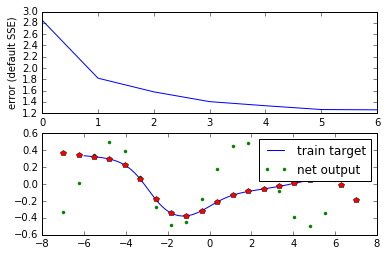

In [5]:
# Simulate network
out = net.sim(inp)

# Plot result
%matplotlib inline
import matplotlib as mpl
import pylab as pl
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('error (default SSE)')

x2 = np.linspace(-6.0,6.0,150)
y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)

y3 = out.reshape(size)

pl.subplot(212)
pl.plot(x2, y2, '-',x , y, '.', x, y3, 'p')
pl.legend(['train target', 'net output'])
pl.show()